# **[Chapter 03]**  
**┗ 자녀와 부모의 IQ 상관관계 분석**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* Data Spec Check
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리」
* 🥈Session 2 - 「EDA」
* 🥇Session 3 - 「Cross validation」

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/00.fast_campus/00.HyperDifference/03.Part4/Chapter03")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/00.fast_campus/00.HyperDifference/03.Part4/Chapter03'

# **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🏭

```
전 세계의 많은 부모들은 자녀의 IQ에 대해서 궁금해한다.
심지어, 아직 결혼을 하지 않은 사람들까지도 미래에 생길지 모르는 자녀의 IQ에 대해서 궁금해한다.
데이터를 통해 자녀의 IQ와 부모의 IQ의 상관관계를 알 수 있을까?
```



> **데이터 살펴보기**

* 아이의 시험점수와 엄마의 정보
* 데이터 명세 ⬇ 

|Column|Description|
|:---|:---|
|kid_score|아이의 시험 점수|
|mom_hs|엄마의 학력|
|mom_iq|엄마의 IQ|
|mom_work|엄마의 일하는 시간|
|mom_age|엄마의 나이|

In [4]:
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 

kidiq = pd.read_csv('data/kidiq.csv')
kidiq.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


# **Data Spec Check**
---
> **Data 가공 명세서** 

<img src = "https://drive.google.com/uc?id=15fkBk2XYBg5XeFaYa1x1R07mzNIEyWXB">

# **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 아이의 IQ와 엄마의 IQ에 대한 관심이 높아지고 있다. 진짜 둘은 관련이 있는지에 대해서 분석해보자
```  

> **기대효과**

```
▶ 관련이 있다면, 여러 연구를 진행하는 것에 사용할 수 있는 하나의 정보가 될 수 있을 것이다
```

> **해결방안**

```
▶ OLS(Ordinary Least Squares)를 이용한 Regression 방법 적용
▶ Session 1 🥉
 - Feature Engineering
 - OLS(Ordinary Least Squares) regression
▶ Session 2 🥈
 - 데이터 시각화
▶ Session 3 🥇
 - K-fold cross validation (statsmodels)
 - K-fold cross validation (scikit-learn)
```

> **성과측정**  

```
▶ 분석
```

> **현업적용**  

```
▶ 데이터 분석 역량
```

> **주요 핵심 미리 살펴보기**  

```
▶ Session 1 → Feature Extraction, OLS Regression
▶ Session 2 → 데이터 시각화
▶ Session 3 → K-fold cross validation (statsmodels, scikit-learn)
```

# **🥉Session 1**  
**┗ Data 전처리 및 EDA**  
---

## · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인 

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) 추가 컬럼 생성

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import patsy
from patsy import dmatrices
import statsmodels
import statsmodels.api as sm #Application Programming Interface
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

In [5]:
kidiq

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


In [6]:
#  Data 형태 확인
#  434 row, 5 col로 구성됨
print('df :', kidiq.shape)

df : (434, 5)


In [7]:
# Data type 확인
kidiq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    int64  
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    int64  
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


In [8]:
# Target이 NaN인 데이터 탐색
kidiq[kidiq['kid_score'].isna()].head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age


In [9]:
#  NaN 데이터 삭제
kidiq = kidiq.dropna()
print(kidiq.isnull().sum().sum())

0


In [10]:
kidiq.describe()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000,2.896313,22.785714
std,20.410688,0.410799,15.000000,1.181394,2.701070
min,20.000000,0.000000,71.037405,1.000000,17.000000
25%,74.000000,1.000000,88.660321,2.000000,21.000000
50%,90.000000,1.000000,97.915254,3.000000,23.000000
75%,102.000000,1.000000,110.272742,4.000000,25.000000
max,144.000000,1.000000,138.893106,4.000000,29.000000


In [11]:
# 추가 컬럼 생성
kidiq['mom_iq_c'] = kidiq['mom_iq'] - kidiq['mom_iq'].mean()
kidiq['mom_age_c'] = kidiq['mom_age'] - kidiq['mom_age'].mean()
kidiq

,kid_score,mom_hs,mom_iq,mom_work,mom_age,mom_iq_c,mom_age_c
0,65,1,121.117529,4,27,21.117529,4.214286
1,98,1,89.361882,4,25,-10.638118,2.214286
2,85,1,115.443165,4,27,15.443165,4.214286
3,83,1,99.449639,3,25,-0.550361,2.214286
4,115,1,92.745710,4,27,-7.254290,4.214286
...,...,...,...,...,...,...,...
429,94,0,84.877412,4,21,-15.122588,-1.785714
430,76,1,92.990392,4,23,-7.009608,0.214286
431,50,0,94.859708,2,24,-5.140292,1.214286
432,88,1,96.856624,2,21,-3.143376,-1.785714


array([[<AxesSubplot:title={'center':'kid_score'}>,
        <AxesSubplot:title={'center':'mom_hs'}>,
        <AxesSubplot:title={'center':'mom_iq'}>],
       [<AxesSubplot:title={'center':'mom_work'}>,
        <AxesSubplot:title={'center':'mom_age'}>,
        <AxesSubplot:title={'center':'mom_iq_c'}>],
       [<AxesSubplot:title={'center':'mom_age_c'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

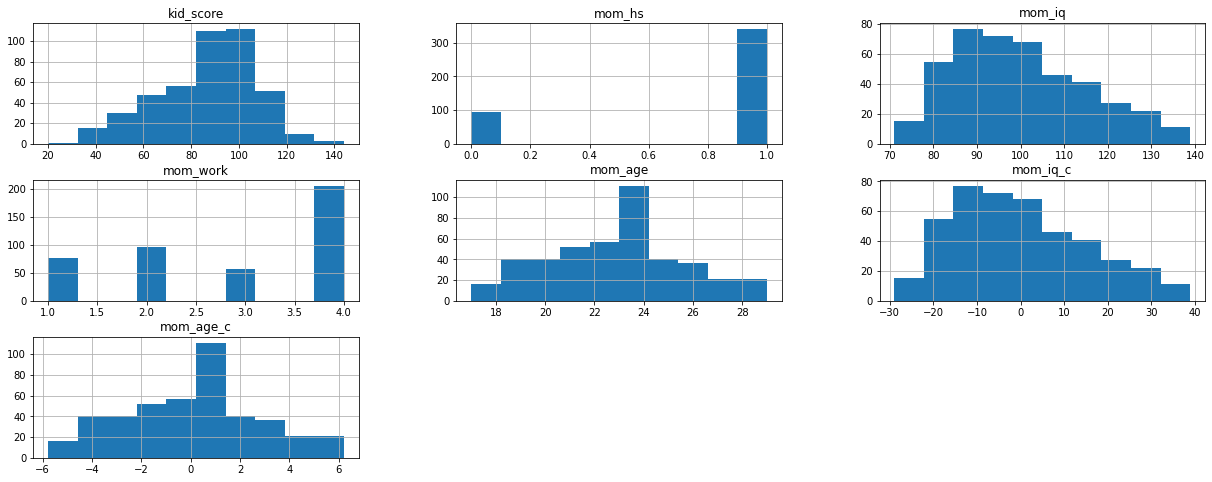

In [12]:
kidiq.hist(figsize=(21,8))

# 🥈Session 2
**┗ EDA 결과 시각화**  
---

## · EDA

In [13]:
# Fit regression model using centered version of mom_iq
# OLS: Ordinary Least Squares)
# 에러(잔차)의 제곱합 (RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법
fit1 = smf.ols('kid_score ~ 1 + mom_hs + mom_iq_c + mom_age_c', data=kidiq).fit()

# 1+ ? + ? + ?
# Inspect results
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     39.25
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           1.94e-22
Time:                        04:57:49   Log-Likelihood:                -1871.8
No. Observations:                 434   AIC:                             3752.
Df Residuals:                     430   BIC:                             3768.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.3602      1.976     41.676      0.0

In [14]:
y = kidiq['kid_score']
X = kidiq[['mom_hs', 'mom_iq_c', 'mom_age_c']] # 1
X = sm.add_constant(X)

model1 = sm.OLS(y,X)

res1 = model1.fit()

print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     39.25
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           1.94e-22
Time:                        05:04:47   Log-Likelihood:                -1871.8
No. Observations:                 434   AIC:                             3752.
Df Residuals:                     430   BIC:                             3768.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.3602      1.976     41.676      0.0

In [16]:
features = res1.params.index
coefs = [round(val, 4) for val in res1.params.values]

dict(zip(features, coefs))

{'const': 82.3602, 'mom_hs': 5.6472, 'mom_iq_c': 0.5625, 'mom_age_c': 0.2248}

In [17]:
print("In-sample R-squared: %.3f" % round(res1.rsquared, 3))

In-sample R-squared: 0.215


In [18]:
print("In-sample RMSE: %.3f" % round(np.mean((y - res1.fittedvalues)**2)**0.5, 3))

In-sample RMSE: 18.063


In [19]:
def abline(intercept, slope, **params):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', **params)

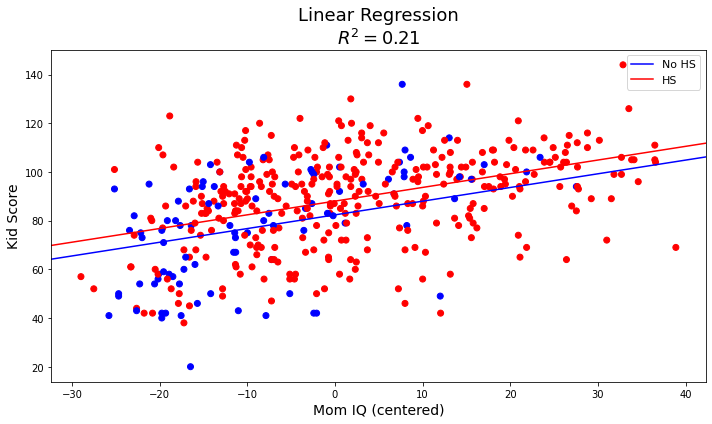

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = {1:'red', 0:'blue'}
b_hat = fit1.params

ax.scatter(kidiq.mom_iq_c, kidiq.kid_score, color=kidiq.mom_hs.map(colors))

sm.graphics.abline_plot(intercept=b_hat['Intercept'],                 slope=b_hat['mom_iq_c'], color='blue',  label='No HS', ax=ax)
sm.graphics.abline_plot(intercept=b_hat['Intercept']+b_hat['mom_hs'], slope=b_hat['mom_iq_c'], color='red', label='HS',    ax=ax)
ax.set_ylabel('Kid Score', fontsize=14)
ax.set_xlabel('Mom IQ (centered)', fontsize=14)
ax.legend(fontsize=11)
ax.set_title('Linear Regression\n$R^2= %.2f$' % fit1.rsquared_adj, fontsize=18)

fig.tight_layout();

# 🥇Session 3
**┗ Cross validation**  
---

## K-fold cross validation using statsmodels and scikit-learn

In [20]:
len(y), round(len(y)*(4/5))

(434, 347)

In [21]:
y = kidiq['kid_score']

X = kidiq[['mom_hs', 'mom_iq_c']]
X = sm.add_constant(X)

X[:5]

,const,mom_hs,mom_iq_c
0,1.0,1,21.117529
1,1.0,1,-10.638118
2,1.0,1,15.443165
3,1.0,1,-0.550361
4,1.0,1,-7.254290


### R-squared

In [28]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123) 

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):     
    res1 = sm.OLS(y[train], X.loc[train,:]).fit()         
    preds = res1.predict(X.loc[test,:])                   
    score = r2_score(y[test], preds)                      
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample R-squared: {:.3f}'.format(k+1, len(y[train]), score))
    
print('\nCV R-squared: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, Out-of-sample R-squared: 0.205
Fold:  2, Training size: 347, Out-of-sample R-squared: 0.070
Fold:  3, Training size: 347, Out-of-sample R-squared: 0.302
Fold:  4, Training size: 347, Out-of-sample R-squared: 0.137
Fold:  5, Training size: 348, Out-of-sample R-squared: 0.264

CV R-squared: 0.196 (+/- 0.084)


In [23]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123) 

kfold.split(X, y)

<generator object _BaseKFold.split at 0x7fd2a3936f90>

### RMSE

In [25]:
y = kidiq['kid_score']

X = kidiq[['mom_hs', 'mom_iq_c']]
X = sm.add_constant(X)

X[:5]

,const,mom_hs,mom_iq_c
0,1.0,1,21.117529
1,1.0,1,-10.638118
2,1.0,1,15.443165
3,1.0,1,-0.550361
4,1.0,1,-7.254290


In [29]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)      

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):         
    res1 = sm.OLS(y[train], X.loc[train,:]).fit()              
    preds = res1.predict(X.loc[test,:])                        
    score = mean_squared_error(y[test], preds, squared=False)  
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample RMSE: {:.3f}'.format(k+1, len(y[train]), score))
    
print('\nCV RMSE: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, Out-of-sample RMSE: 18.394
Fold:  2, Training size: 347, Out-of-sample RMSE: 18.640
Fold:  3, Training size: 347, Out-of-sample RMSE: 17.431
Fold:  4, Training size: 347, Out-of-sample RMSE: 18.849
Fold:  5, Training size: 348, Out-of-sample RMSE: 17.594

CV RMSE: 18.182 (+/- 0.567)


## Create an interaction term between `mom_hs` and `mom_iq_c`

In [30]:
y = kidiq['kid_score']

kidiq['mom_hs_iq_c'] = kidiq['mom_hs'] * kidiq['mom_iq_c']

X = kidiq[['mom_hs', 'mom_iq_c', 'mom_hs_iq_c']]
X = sm.add_constant(X)

X[-5:]

,const,mom_hs,mom_iq_c,mom_hs_iq_c
429,1.0,0,-15.122588,-0.000000
430,1.0,1,-7.009608,-7.009608
431,1.0,0,-5.140292,-0.000000
432,1.0,1,-3.143376,-3.143376
433,1.0,1,-8.746664,-8.746664


## Run **5**-fold cross-validation on the expanded model that includes `mom_hs`, `mom_iq_c`, and `mom_hs`*`mom_iq_c`

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):
    res1 = sm.OLS(y[train], X.loc[train,:]).fit()
    preds = res1.predict(X.loc[test,:])
    score = r2_score(y[test], preds)
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample R-squared: {:.3f}'.format(k+1, len(y[train]), score))
    
print('\nCV R-squared: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, Out-of-sample R-squared: 0.224
Fold:  2, Training size: 347, Out-of-sample R-squared: 0.103
Fold:  3, Training size: 347, Out-of-sample R-squared: 0.322
Fold:  4, Training size: 347, Out-of-sample R-squared: 0.103
Fold:  5, Training size: 348, Out-of-sample R-squared: 0.290

CV R-squared: 0.208 (+/- 0.092)


## Run 10-fold cross-validation on the expanded model, using `RMSE` as the evaluation metric

In [31]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):
    res1 = sm.OLS(y[train], X.loc[train,:]).fit()
    preds = res1.predict(X.loc[test,:])
    score = mean_squared_error(y[test], preds, squared=False)
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample RMSE: {:.3f}'.format(k+1, len(y[train]), score))
    
print('\nCV RMSE: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 390, Out-of-sample RMSE: 18.557
Fold:  2, Training size: 390, Out-of-sample RMSE: 17.975
Fold:  3, Training size: 390, Out-of-sample RMSE: 19.506
Fold:  4, Training size: 390, Out-of-sample RMSE: 16.829
Fold:  5, Training size: 391, Out-of-sample RMSE: 18.527
Fold:  6, Training size: 391, Out-of-sample RMSE: 16.476
Fold:  7, Training size: 391, Out-of-sample RMSE: 20.745
Fold:  8, Training size: 391, Out-of-sample RMSE: 16.658
Fold:  9, Training size: 391, Out-of-sample RMSE: 17.683
Fold: 10, Training size: 391, Out-of-sample RMSE: 17.010

CV RMSE: 17.997 (+/- 1.302)


## Kfold cross validation "by hand"

#### R-squared

In [33]:
y = kidiq['kid_score'].values
X = kidiq[['mom_hs', 'mom_iq_c']]
X = sm.add_constant(X)
X = X.values
y

array([ 65,  98,  85,  83, 115,  98,  69, 106, 102,  95,  91,  58,  84,
        78, 102, 110, 102,  99, 105, 101, 102, 115, 100,  87,  99,  96,
        72,  78,  77,  98,  69, 130, 109, 106,  92, 100, 107,  86,  90,
       110, 107, 113,  65, 102, 103, 111,  42, 100,  67,  92, 100, 110,
        56, 107,  97,  56,  95,  78,  76,  86,  79,  81,  79,  79,  56,
        52,  63,  80,  87,  88,  92, 100,  94, 117, 102, 107,  99,  73,
        56,  78,  94, 110, 109,  86,  92,  91, 123, 102, 105, 114,  96,
        66, 104, 108,  84,  83,  83,  92, 109,  95,  93, 114, 106,  87,
        65,  95,  61,  73, 112, 113,  49, 105, 122,  96,  97,  94, 117,
       136,  85, 116, 106,  99,  94,  89, 119, 112, 104,  92,  86,  69,
        45,  57,  94, 104,  89, 144,  52, 102, 106,  98,  97,  94, 111,
       100, 105,  90,  98, 121, 106, 121, 102,  64,  99,  81,  69,  84,
       104, 104, 107,  88,  67, 103,  94, 109,  94,  98, 102, 104, 114,
        87, 102,  77, 109,  94,  93,  86,  97,  97,  88, 103,  8

In [37]:
[84, 84, 84, 84, 84]

array([[9, 9],
       [9, 9]])

In [38]:
n_samples = len(y)
indices = np.arange(n_samples)

n_splits = 5
num_val_samples = np.full(n_splits, n_samples // n_splits, dtype=int)
num_val_samples[: n_samples % n_splits] += 1

scores = []
for i in range(n_splits):
    start =  i      * num_val_samples[i]
    stop  = (i + 1) * num_val_samples[i] # data [0:84]
    y_test = y[indices[start:stop]]
    X_test = X[indices[start:stop], :]
    y_train = np.concatenate([ y[indices[:start]] , 
                               y[indices[stop:]] ] , axis=0)
    X_train = np.concatenate([ X[indices[:start], :] , 
                               X[indices[stop:], :] ] , axis=0)

    res1 = sm.OLS(y_train, X_train).fit()
    score = res1.rsquared
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample R-squared: {:.3f}'.format(i+1, len(y_train), score))

print('\nCV R-squared: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, Out-of-sample R-squared: 0.252
Fold:  2, Training size: 347, Out-of-sample R-squared: 0.185
Fold:  3, Training size: 347, Out-of-sample R-squared: 0.205
Fold:  4, Training size: 347, Out-of-sample R-squared: 0.196
Fold:  5, Training size: 348, Out-of-sample R-squared: 0.228

CV R-squared: 0.213 (+/- 0.024)


#### RMSE

In [39]:
y = kidiq['kid_score'].values
X = kidiq[['mom_hs', 'mom_iq_c']]
X = sm.add_constant(X)
X = X.values

n_samples = len(y)
indices = np.arange(n_samples)

n_splits = 5
num_val_samples = np.full(n_splits, n_samples // n_splits, dtype=int)
num_val_samples[: n_samples % n_splits] += 1

scores = []
for i in range(n_splits):
    start =  i      * num_val_samples[i]
    stop  = (i + 1) * num_val_samples[i]
    y_test = y[indices[start:stop]]
    X_test = X[indices[start:stop], :]
    y_train = np.concatenate([ y[indices[:start]] , 
                               y[indices[stop:]] ] , axis=0)
    X_train = np.concatenate([ X[indices[:start], :] , 
                               X[indices[stop:], :] ] , axis=0)

    res1 = sm.OLS(y_train, X_train).fit()
    preds = res1.predict(X_test)
    score = np.mean((y_test - preds)**2)**0.5
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, RMSE: {:.3f}'.format(i+1, len(y_train), score))

print('\nCV RMSE: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, RMSE: 18.242
Fold:  2, Training size: 347, RMSE: 17.234
Fold:  3, Training size: 347, RMSE: 15.566
Fold:  4, Training size: 347, RMSE: 23.994
Fold:  5, Training size: 348, RMSE: 18.744

CV RMSE: 18.756 (+/- 2.835)


## Using scikit-learn

In [42]:
y = kidiq['kid_score']
y

0       65
1       98
2       85
3       83
4      115
      ... 
429     94
430     76
431     50
432     88
433     70
Name: kid_score, Length: 434, dtype: int64

In [43]:
X = kidiq[['mom_hs', 'mom_iq_c']]
X

,mom_hs,mom_iq_c
0,1,21.117529
1,1,-10.638118
2,1,15.443165
3,1,-0.550361
4,1,-7.254290
...,...,...
429,0,-15.122588
430,1,-7.009608
431,0,-5.140292
432,1,-3.143376


In [44]:
lm1 = LinearRegression().fit(X, y)
lm1

LinearRegression()

In [45]:
coefs = [round(val, 3) for val in list(np.concatenate((lm1.intercept_, lm1.coef_), axis=None))]
features = list(np.concatenate((np.array('Intercept'), lm1.feature_names_in_), axis=None))

dict(zip(features, coefs))

{'Intercept': 82.122, 'mom_hs': 5.95, 'mom_iq_c': 0.564}

In [46]:
# The in-sample coefficient of determination: 1 is perfect prediction
print("In-sample R-squared: %.3f" % round(lm1.score(X, y), 3))

In-sample R-squared: 0.214


In [47]:
print("In-sample RMSE: %.3f" % round(mean_squared_error(y, lm1.predict(X), squared=False), 3))

In-sample RMSE: 18.073


## Cross validation using scikit-learn

#### R-squared

In [48]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):
    lm1.fit(X.loc[train,:], y[train])
    score = lm1.score(X.loc[test,:], y[test])
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample R-squared: {:.3f}'.format(k+1, len(y[train]), score))
    
print('\nCV R-squared: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, Out-of-sample R-squared: 0.205
Fold:  2, Training size: 347, Out-of-sample R-squared: 0.070
Fold:  3, Training size: 347, Out-of-sample R-squared: 0.302
Fold:  4, Training size: 347, Out-of-sample R-squared: 0.137
Fold:  5, Training size: 348, Out-of-sample R-squared: 0.264

CV R-squared: 0.196 (+/- 0.084)


#### RMSE

In [49]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):
    lm1.fit(X.loc[train,:], y[train])
    preds = lm1.predict(X.loc[test,:])
    score = mean_squared_error(y[test], preds, squared=False)
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample RMSE: {:.3f}'.format(k+1, len(y[train]), score))
    
print('\nCV RMSE: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores, ddof=1) * 2))

Fold:  1, Training size: 347, Out-of-sample RMSE: 18.394
Fold:  2, Training size: 347, Out-of-sample RMSE: 18.640
Fold:  3, Training size: 347, Out-of-sample RMSE: 17.431
Fold:  4, Training size: 347, Out-of-sample RMSE: 18.849
Fold:  5, Training size: 348, Out-of-sample RMSE: 17.594

CV RMSE: 18.182 (+/- 1.268)


# Lesson and Learned

## Cross validation은 어떨때 유의미하게 사용될 수 있는가?

### 1. 데이터의 크기가 매우 커서 나눠지는 데이터의 분포를 담보할 수 없을 때
### 2. 모델의 복잡도가 매우 높아서 데이터의 특성에 따라 결과가 바뀔 때
### 3. 대부분의 경우

## Cross validation의 결과에서 특정 Fold에서만 결과가 잘나오는 경우, 배포는 어떻게 하면 될까?
### 예를 들어, 5-fold cross validation에서 1번 3번의 fold에서만 결과가 잘 나오고, 2,4,5번의 fold에서는 결과가 잘 나오지 않을 때는 어떻게 할까?
#### 1. 보통의 경우, 결과는 모든 fold에서 대해서 정리하고 가장 결과가 좋은 데이터를 활용한 모델의 weight를 이용하여 최종 모델을 생성
#### 2. 2,4,5번의 fold의 데이터를 별개로 분석하여 해당 데이터셋에서 결과가 낮게 나오는 이유를 분석하여 모델링 특성에 반영
#### ※ 그러나, 전체 데이터를 모두 반영한 모델의 찾는 것은 매우 어렵기 때문에 Trade-off 관계를 분석하여 타협점이 찾는 것이 최적